In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
from scipy.special import inv_boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import animation as F
from IPython.display import HTML
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import plotly as py
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', module='sklearn')
sns.set()

# Linear Models in Machine Learning on Python: Linear Regression 3

This is a script of codes that I made in order to practice while I was learning machine learning. Afterwards, I thought I could edit and develop this notebook, so that other people could make use of it and perhaps expedite their learning process. This is not a complete guide to linear models, however, it contains a lot of practices and mathematical aspects of algortihms. There will be three main notebooks about Linear Models 
Part 1: Linear Regression, Part 2: Logistic Regression, and Part 3: Generalized Linear Models. I will introduce different steps of feature processing and different datasets in which I apply these models, thereby, even if I split them into 3 main parts there may be more than 3 notebooks. I will try to explain algorithms and code as much as possible, however, these topics may be hard for a beginner. In fact, I did not intend this notebook for beginners but for those who have some idea of how algorithms work and want to improve their understanding of both mathematics behind the algorithms and codes to implement the algorithm. In each section, I added external resources that I found helpful when I was learning machine learning. Moreover, I reviewed some processes a couple of time in each example, my aim for doing this is to get you more familiar with these steps. I think this notebook can help a lot to people who intuitively know the algorithms to some extent but want to dive deeper and get some experience. I hope some people can make use of this notebook and learn these machine learning models.

## Regularization and Cross Validation

In the previous examples we can observe one obvious thing, that is there is always some difference between the performance of our model on test set and training set. When we talk about this difference, two important concepts are arising overfitting and underfitting. Overfitting happens when we have too many features and fitting the training data so well but the model fails to fit the test data. In this case, we say that the model doesn't generalize well on new data which is also called overfitting. Underfitting, on the other hand, is the opposite of overfitting. In other words, it happens when the model cannot fit the training data well. To deal with these problems we either need to increase or decrease complexity of our model. We use regularization for that purpose. By increasing the number of predictors we use (increasing degrees of freedom), we also increase our complexity of model, by using regularization we can tune our weights so that we constrain some of our predictors and the complexity doesn't go higher than it should be. We can control the amount of regularization we apply to a model by a hyperparameter (Hyperparameters are parameters that are not actually a part of model but part of learning algorithm).

## L2 Regularization

L2 regularization or a.k.a Ridge Regression is one of the most used regularization techniques. It adds the term $\lambda \sum \:_{j=1}^n\theta _j^2$ into our cost function. Here we have the hyperparameter $\lambda$ which we will use to control how much we want to regularize our model. Let's add regularization to our cost function.
$$J\left(\theta \:\right)=\frac{1}{2m}\left[\sum \:_{i=1}^m\:\left(h_{\theta }\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^2+\lambda \:\cdot \sum \:\:_{j=1}^n\:\theta \:\:_j^2\right]$$

Our gradient descent then becomes 
$$\theta _j:=\theta _j-\:\alpha \left[\left(\frac{1}{m}\:\sum \:_{i=1}^m\left(h_{\theta }\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^2\cdot \:\:x_j^{\left(i\right)}\right)+\frac{\lambda \:}{m}\cdot \:\theta \:_j\:\right]\:$$

## L1 Regularization

L1 Regularization or a.k.a Lasso Regularization is another regularization technique which add the term $\lambda \sum _{j=1}^n\left|\theta_j\right|$ into our cost function. We can find the cost function below. One important thing that should be mentioned that We cannot directly write updating rule of gradient descent for lasso regularization as I have written the one for ridge regularization. That is because of that when we add lasso regularization into our cost function, the function becomes undifferentiable (actually it becomes undifferentiable at $\theta=0$) which takes us to the conclusion the function doesn't have a closed form solution anymore. However, we can still use gradient descent to solve lasso regression. Namely we use subgradient vector method for solving lasso regression. I don't want to go into details of that problem here but if you are curious you can find more information about that in the [link](https://machinelearningcompass.com/machine_learning_math/subgradient_descent/).

$$J\left(\theta \right)=\frac{1}{2m}\left[\sum_{i=1}^m\:\left(h_{\theta }\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^2+\lambda \:\sum _{j=1}^n\:\left|\theta_j\right|\right]$$

## Elastic New Regularization

Elastic net regularization is the combination of L1 and L2 regularization techniques. It has the cost function below.
$$J\left(\theta\right)=\frac{1}{2m}\left[\sum_{i=1}^m\:\left(h_{\theta \:}\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^2+\lambda_1 \:\sum _{j=1}^n\:\theta _j^2+\lambda_2 \sum_{j=1}^n\left|\theta_j\right|\right]$$

## Cross Validation

In the previous examples we subdivide our data into train and test sets. Here we will look at another concept called Cross Validation. In cross validation we divide our data into k number of folds and select one of the folds for testing. Then we use remaining folds to train our model and then use the excluded fold for testing our model's performance. We repeat this process again and again. Afterwards, we get the model with best performance on that folds. I recommend watching Statquest's video on that topic for those who aren't familiar with this concept [link](https://www.youtube.com/watch?v=fSytzGwwBVw&t=280s). 

Moreover, I will use GridSearch or RandomSearch for finding best hyperparameters.

### Boston Dataset

Here I will switch to another dataset. Ames dataset is a bit big for computations which would take my more time while trying to work on data ( I actually tried it ), on the other hand, boston house dataset is a bit more convenient for regularization part. In the code below, I load the dataset and set up our predictors and target variable.

In [6]:
import pickle
data= pickle.load(open('boston_housing_clean.pickle', "rb" ))

In [7]:
boston_data = data['dataframe']
X = boston_data.drop('MEDV', axis=1)#predictors

y = boston_data.MEDV #target

In [8]:
# checking for categorical values.
dt = boston_data.dtypes == object 
columns_categorical = boston_data.columns[dt]
columns_categorical

Index([], dtype='object')

By using `Kfold()` function i will split the data into 3 different folds. You can find more about this function on the website [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [9]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

Just like the `LinearRegression()` we can use `Ridge()`. One important change is that we need to set an alphe value. Here I will use 0.001 but in the subsequent examples we will see some ways to find the best alpha value.

In [11]:
# Decreasing regularization and ensuring convergence
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X)
s=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)


r = Ridge(alpha = 0.001)
X_train_s = s.fit_transform(X_train)
r.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_r = r.predict(X_test_s)

# Calculating r2 score
print(r2_score(y_pred_r, y_test))


0.8572665538430446


Let's look at our coefficients as well.

In [12]:
r.coef_

array([  7.69158031,   9.88890473, -25.00525751,   5.31046818,
        -2.60993701,  14.95803313,  22.31375473, -22.8579177 ,
        27.76499232,  -1.5651209 ,  17.07749893,  21.85840549,
        11.57430607,   1.0501267 ,   0.43058525,  13.78571186,
         1.8138621 ,  -8.34497303,   4.99428114,  -3.56428247,
        -3.43620979, -16.33550823,  -7.04652168,   6.60858547,
        -1.47661   ,   4.68585754,  -1.30404236,  -0.05944784,
        -0.30379373, -12.84226172,   1.97669112,   1.08130677,
        -0.67550448,  -1.07931934,   4.49162494,  -4.26689794,
         4.67486611,  -1.28089201,   8.66602804,  -0.27373083,
        -8.11960573,  11.78297941,   6.53845776,   1.32299881,
         2.05956326,   0.89895643,   1.7894665 ,   4.74421976,
        -4.66441531,   5.31046818,  -3.23646667,  -8.66803392,
         0.97293208,   1.13586914,   0.29037187,  -1.63142731,
        -2.92599804,   2.92315095,  -0.73510358,  11.89603615,
         0.75403388,  -7.53119729,  18.30567198, -22.16

### Finding Best Alpha Values

In context of Cross validation we also have some functions that finds best hyperparameters for us. We generally use GridSearchCV and RandomSearchCV for finding the hyperparameters that gives us the best results. Instead of using GridSearchCV here I will use another one called RidgeCv which finds the best alpha values for us. But before using any of these functions let's try to find the best alpha values manually by using some loops and something called pipiline. In pipeline we define a sequence of task, this is an easier way of doing lots of steps in just one code. We define the steps and then only run pipeline itself. You can learn more about these function and pipelines by clicking the links.

Pipelines: [link](https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/)

GridSearchCV and RandomSearchCV: [link](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)

Also don't forget the check the parameters that you can use with these functions, you can find them on [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

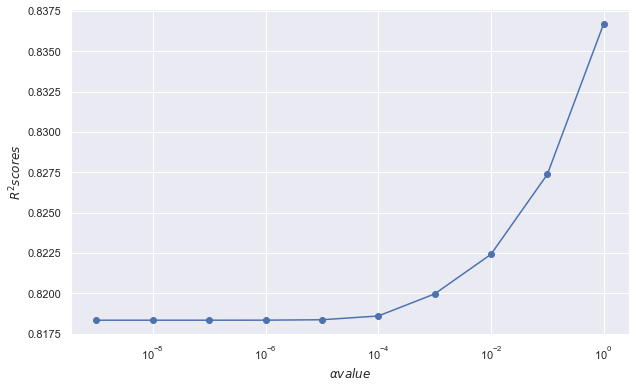

In [13]:
pf = PolynomialFeatures(degree=2)
alpha_values = np.geomspace(1e-9, 1e0, num=10)
scores=[]
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.figure(figsize=(10,6))
plt.semilogx(alpha_values, scores, '-o')
plt.xlabel('$\\alpha value$')
plt.ylabel('$R^2 scores$');

Let's use the alpha value we found above to see whether or not R Squared matches. I will pass the value 1e-1 and it's supposed to give a R Squared score around 0.8275 

In [14]:
np.argmax(scores) // 15
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=1e-1))])

predictions = cross_val_predict(best_estimator, X, y, cv = kf)
score = r2_score(y, predictions)
score

0.8273692118671543

What would happen if we use directly fit() function instead of cross validation ?

In [15]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=1e-2))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9290097443102934

Interestingly when we directly use fit() function we get a better result. Really ? Actually not. Here we are using the X values that our data is trained on, therefore, it is normal to get a bigger R Squared compared to cross validation result.

In [16]:
best_estimator.named_steps["ridge_regression"].coef_ # We can also show our coefficients as well.

array([ 0.00000000e+00,  4.15956095e+00,  2.11356960e+00,  3.84761776e+00,
        1.45433943e-01, -1.94462939e+00,  3.51499855e+00, -2.08615867e+00,
       -2.55812195e+00, -2.85900160e+00,  1.94778567e+00,  1.42376470e-01,
        1.43846487e+00, -3.16701889e+00,  1.31037973e-01,  1.12221749e+01,
        8.64689457e+00,  5.52349731e+00, -8.15855594e-01,  7.82040506e-01,
       -7.93736629e-01, -1.65439211e+00, -4.51926941e+00, -3.96207778e+00,
        4.60916485e+00, -2.40338109e-01,  1.25931060e+00, -2.47733963e-01,
       -7.86964591e-01, -3.50941230e-01, -2.64364881e+00,  1.93485707e-01,
        1.38844222e-02, -6.10672362e-01, -8.78618275e-01,  2.45283683e+00,
       -3.09916364e-01,  1.19949983e+00, -6.73095648e-01,  1.70526840e+00,
       -6.82039190e-03,  1.16887260e+00,  1.44598951e+00,  6.70044419e-01,
        2.00868178e+00, -1.02621659e+00,  6.92570815e-01,  9.53215096e-03,
        1.39905594e+00, -4.18798901e-01,  4.93864480e-01, -9.66002755e-01,
       -9.72516533e-01,  

Let's do the same steps for Lasso Regression as well and manually try to find best alpha values.

In [17]:
pf = PolynomialFeatures(degree=2)

scores = []
alpha_values = np.geomspace(1e-9, 1e0, num=10)
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", lasso)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)


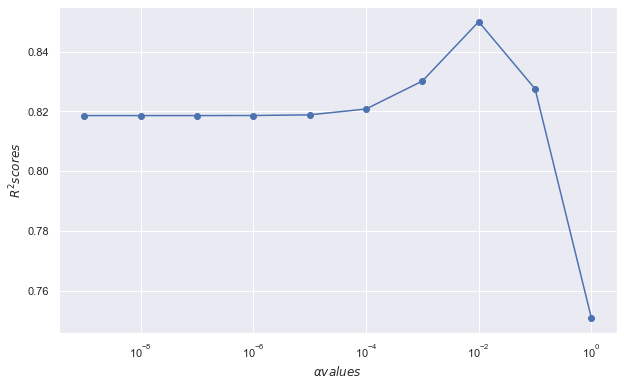

In [18]:
plt.figure(figsize=(10,6))
plt.semilogx(alpha_values, scores, '-o')
plt.xlabel('$\\alpha values$')
plt.ylabel('$R^2 scores$');

Let's train the model with the best alpha value again

In [19]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=1e-2))])

predictions = cross_val_predict(best_estimator, X, y, cv = kf)
score = r2_score(y, predictions)
score

0.8499072215385698

As same in the previous example, If we don't use crossvalidation we get a bigger score.

In [20]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Ridge(alpha=1e-2))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9290097443102934

In [21]:
best_estimator.named_steps["lasso_regression"].coef_

array([ 0.00000000e+00,  4.15956095e+00,  2.11356960e+00,  3.84761776e+00,
        1.45433943e-01, -1.94462939e+00,  3.51499855e+00, -2.08615867e+00,
       -2.55812195e+00, -2.85900160e+00,  1.94778567e+00,  1.42376470e-01,
        1.43846487e+00, -3.16701889e+00,  1.31037973e-01,  1.12221749e+01,
        8.64689457e+00,  5.52349731e+00, -8.15855594e-01,  7.82040506e-01,
       -7.93736629e-01, -1.65439211e+00, -4.51926941e+00, -3.96207778e+00,
        4.60916485e+00, -2.40338109e-01,  1.25931060e+00, -2.47733963e-01,
       -7.86964591e-01, -3.50941230e-01, -2.64364881e+00,  1.93485707e-01,
        1.38844222e-02, -6.10672362e-01, -8.78618275e-01,  2.45283683e+00,
       -3.09916364e-01,  1.19949983e+00, -6.73095648e-01,  1.70526840e+00,
       -6.82039190e-03,  1.16887260e+00,  1.44598951e+00,  6.70044419e-01,
        2.00868178e+00, -1.02621659e+00,  6.92570815e-01,  9.53215096e-03,
        1.39905594e+00, -4.18798901e-01,  4.93864480e-01, -9.66002755e-01,
       -9.72516533e-01,  

I talked about GridSearchCV and RandomSearchCV but there are some other functions that we can use finding hyperparameters. These function are easier to use, that's why, I will start will them. For finding alpha values and applying cross validation we can directly use a function called `RidgeCV()`.

In [22]:
from sklearn.linear_model import RidgeCV

alpha_values = np.geomspace(1e-9, 1e0, num=10)
pf = PolynomialFeatures(degree=2,include_bias=False)
X_pf = pf.fit_transform(X)

ridgeCV = RidgeCV(alphas=alpha_values, cv=13).fit(X_pf, y)

ridgeCV_rmse = np.sqrt(mean_squared_error(y, ridgeCV.predict(X_pf)))
ridgeCV_Rsquared=r2_score(y, ridgeCV.predict(X_pf))



We can also use another function called `LassoCV()` to find hyperparameters for Lasso Regression.

In [23]:
from sklearn.linear_model import LassoCV

alpha_values2 = np.geomspace(1e-9, 1e0, num=10)
pf = PolynomialFeatures(degree=2,include_bias=False)
X_pf = pf.fit_transform(X)
lassoCV = LassoCV(alphas=alpha_values2,
                  max_iter=5e4,
                  cv=3).fit(X_pf, y)

lassoCV_rmse = np.sqrt(mean_squared_error(y, lassoCV.predict(X_pf)))
lassoCV_Rsquared=r2_score(y, lassoCV.predict(X_pf))

#print(lassoCV.alpha_, lassoCV_Rsquared)  # Lasso is slower

I didn't show any example about ElasticNet, therefore I would like to use it here. I will use `ElasticNetCV()` here to find the best alpha values for the regression.

In [25]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)
alpha_values = np.geomspace(1e-9, 1e0, num=10)
elasticNetCV = ElasticNetCV(alphas=alpha_values, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_pf, y)
elasticNetCV_rmse = np.sqrt(mean_squared_error(y, elasticNetCV.predict(X_pf)))
elasticNetCV_Rsquared=r2_score(y, elasticNetCV.predict(X_pf))
#print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_Rsquared)


Okay now let's see which regularized model is better. I will create a pandas dataframe that show the metrics of the models that we trained.

In [26]:
rmse_vals = [ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]
rsquared_vals = [ridgeCV_Rsquared, lassoCV_Rsquared, elasticNetCV_Rsquared]
alpha_vals = [ridgeCV.alpha_, lassoCV.alpha_, elasticNetCV.alpha_]

labels = ['Ridge', 'Lasso', 'ElasticNet']
columns=['Alpha Values','RMSE','RSquared']

df =pd.DataFrame([alpha_vals, rmse_vals, rsquared_vals])
df=df.T
df.rename(columns={0: 'Alpha Values',1:'RMSE',2:'RSquared'}, index={0:'Ridge',1:'Lasso',2: 'ElasticNet'}, inplace=True)
df

,Alpha Values,RMSE,RSquared
Ridge,1.00,2.536687,0.923776
Lasso,0.01,2.566238,0.921990
ElasticNet,1.00,3.117250,0.884893


Ridge regression looks slightly better. An important topic that I want to share with you is that Ridge regression is tend to work better when we have more relevant features and Lasso can eleminate unrelevant features, that's because, it might be reasonable to use it when we have lot's of features.

In [40]:
rmse_vals = [ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]
rsquared_vals = [ridgeCV_Rsquared, lassoCV_Rsquared, elasticNetCV_Rsquared]
alpha_vals = [ridgeCV.alpha_, lassoCV.alpha_, elasticNetCV.alpha_]

labels = [ 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(alpha_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'Alpha Values'}, inplace=1)


rmse_df['RMSE'] = pd.Series(rmse_vals)

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={1: 'RMSE'}, inplace=1)
rmse_df = pd.Series(rsquared_vals, index=labels).to_frame()
rmse_df.rename(columns={2: 'RSquared'}, inplace=1)



C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


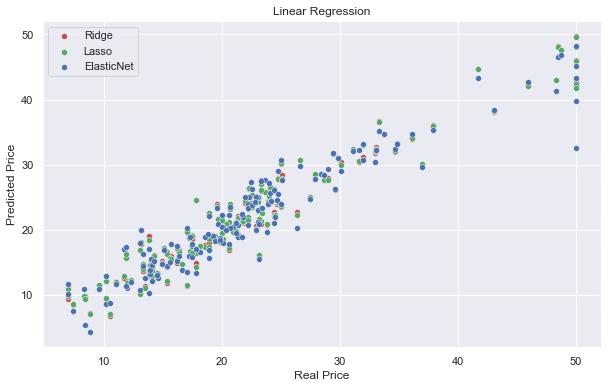

In [27]:
figure = plt.figure(figsize=(10,6))

ax = plt.axes()
model_names = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]
colors=['r','g','b']

for models, names,clr in zip(models, model_names,colors):
    sns.scatterplot(y_test, models.predict(X_test),label=names, color=clr)


ax.set(xlabel='Real Price', 
       ylabel='Predicted Price', 
       title='Linear Regression');

Now It's time to use GridSearchCV. Here I will have 2 different pipelines one for Ridge Regression and the other for Lasso Regression. GridSearchCv will find not only the alpha values for me but also degree of polynomial features that gives the best result.

In [28]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
Lasso
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

estimator2 = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(1e-9, 1e0, num=10),
}
params2 = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(1e-9, 1e0, num=10),
}


Now Let's use the GridSearchCV and find the best estimator values.

In [29]:
models = {'Lasso': GridSearchCV(estimator, params, cv=kf).fit(X, y).best_estimator_,
           'Ridge': GridSearchCV(estimator2, params2, cv=kf).fit(X, y).best_estimator_}

In [30]:
r2_score(y,models['Lasso'].fit(X,y).predict(X)) # RSquared for Lasso Regression

0.9271062039183926

In [31]:
r2_score(y,models['Ridge'].fit(X,y).predict(X)) # RSquared for Ridge Regression

0.9241797703677183

Looks like Lasso Regression performs a bit better. But be careful that I didn't use cross validation here and we are trying to predict with the values that we used to train the model. We should always care about the performance on test data.

In [32]:
r2_score(y,cross_val_predict(models['Lasso'], X, y, cv = kf))


0.8367096592832202

In [33]:
r2_score(y,cross_val_predict(models['Ridge'], X, y, cv = kf))

0.8499072215385698

When we use cross validation it turns out that Ridge Regression actually is the one that performs better.

We can also use the grid search in the way below.

In [34]:
grid = GridSearchCV(estimator, params, cv=kf)

In [35]:
grid.fit(X, y)#fitting gridsearch

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])})

In [36]:
grid.best_score_, grid.best_params_ # finding best scores and best parameters

(0.8347116332428728,
 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 1.0})

Last but not least, before moving on the next example I would like to show that I have been waiting for a while. In the code below I will show whether or not scaling improves our model's predictions. Here instead of using linear regression function I will use another function called `SGDRegressor()` which uses Stochastic Gradient Descent and apply linear regression. You can find more about this function in the [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).

In [42]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X)

# Train_test Splitting
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

# Now I will declare the hyperparameters that I will use
model_parameters_dict = {
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

#Applying Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


new_rmses = {}
new_rmses2 = {}
new_rmses3 = {}
for modellabel, parameters in model_parameters_dict.items():
    
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = format(np.sqrt(mean_squared_error(y_test, SGD.predict(X_test))),'f')
    
    # Tuning learning rate
    SGD_tuned = SGDRegressor(eta0=1e-7, **parameters)
    SGD_tuned.fit(X_train, y_train)
    new_rmses2[modellabel] = format(np.sqrt(mean_squared_error(y_test, SGD_tuned.predict(X_test))),'f')
    
    # Okay now let's fit the model and add RMSE into our df.
    SGD_scaled = SGDRegressor(**parameters)
    SGD_scaled.fit(X_train_scaled, y_train)
    new_rmses3[modellabel] = np.sqrt(mean_squared_error(y_test, SGD_scaled.predict(X_test_scaled)))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses2)
rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses3)
rmse_df.drop(0,axis=1,inplace=True) # Dropping R Squared scores
rmse_df

,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Ridge,19191470097192316928.000000,1558272985585374.250000,9.369171
Lasso,31929913425377128448.000000,250709826881961.218750,5.339741
ElasticNet,32204413447778127872.000000,543044467116120.437500,8.574329


As you can see when we scale our weights Gradient Descent performs much better so that we get a much more lower RMSE as well.

The next notebook on linear models will be the last one about regression (I may also show SVM Regression later but I'm not still sure about that). In that model I will be sort of summing up all the tings we have done so far, in addition, I will also show some new things such as creating our own transformer. We will be working on some covid data and trying to predict the death toll.